## Загрузка данных

In [2]:
!apt-get update -qq && apt-get install -y megatools

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
megatools is already the newest version (1.10.3-1build1).
0 upgraded, 0 newly installed, 0 to remove and 160 not upgraded.


In [3]:
!megadl 'https://mega.nz/file/Eupi2LqJ#eeOGKrPv5uZZK5W6Dg2E6ZeE7gQhp-vbYcRBbrY20OM'

Downloaded aaa_desc_gen.tar.gz33;1m97.06% - 3.5 GiB (3,778,799,912 bytes) of 3.6 GiB (60.7 MiB/s)K0K


In [6]:
import tarfile
import os
import pandas as pd

In [ ]:
archive_path = "aaa_desc_gen.tar.gz"
output_dir   = "aaa_extracted"

os.makedirs(output_dir, exist_ok=True)

with tarfile.open(archive_path, "r:gz") as tar:
    tar.extractall(path=output_dir)

print(f"Extracted files to ./{output_dir}")

## EDA

In [7]:
META_INFO = "/kaggle/working/aaa_extracted/aaa_desc_gen_data/meta_info.csv"

In [8]:
df = pd.read_csv(META_INFO)

In [10]:
df.sample(5)

item_id                              title  \
12030  1851418252245  Сарафан летний на девочку 122-128   
32248  1846662750605            Блузка школьная 158-160   
16988  1841388750493          Спортивный костюм детский   
27743  1820480250164            Рубашка Crespino, р.158   
14282  1842144000129                    Платье нарядное   

                                             description  \
12030  Продаю Новый сарафан на девочку Barbie на рост...   
32248  Блузка школьная в идеальном состоянии на рост ...   
16988  ВНИМАНИЕ! На костюме присутствует производстве...   
27743  Рубашка Crespino, р.158, 100% хлопок.\nСостоян...   
14282  платье очень лёгкое и красивое ,не просвечивае...   

                                                   attrs  \
12030  {'Вид одежды': 'Платья', 'Предмет одежды': 'Пл...   
32248  {'Вид одежды': 'Для девочек', 'Предмет одежды'...   
16988  {'Вид одежды': 'Для девочек', 'Предмет одежды'...   
27743  {'Предмет одежды': 'Рубашки', 'Вид одежды': 'Д...   
14282  {'Вид одежды': 'Платья', 'Предмет одежды': 'Пл...   

                                                  images  \
12030  [29587432104, 29587480757, 29587502304, 295875...   
32248  [29465726098, 29465732725, 29465737341, 294657...   
16988            [29322100779, 29322100803, 29322100901]   
27743  [28992462336, 28992462298, 28992462590, 289924...   
14282                         [29333291712, 29333291678]   

                    category  \
12030      (Ж) Платья и юбки   
32248   (Ж) Блузки и рубашки   
16988  (Ж) Пиджаки и костюмы   
27743            (М) Рубашки   
14282      (Ж) Платья и юбки   

                                                   other  
12030  Летний сарафан для девочки на рост 122-128 см....  
32248  Школьная блузка Colabear на рост 158-160 см в ...  
16988  Продается новый детский спортивный костюм для ...  
27743  Элегантная белая рубашка Crespino для мальчико...  
14282  Нарядное розовое платье от бренда Sela для дев...

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37441 entries, 0 to 37440
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item_id      37441 non-null  int64 
 1   title        37441 non-null  object
 2   description  37441 non-null  object
 3   attrs        37441 non-null  object
 4   images       37441 non-null  object
 5   category     37441 non-null  object
 6   other        37441 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.0+ MB


### Статистический анализ текстовых полей

In [16]:
df['Длина заголовка, символов'] = df['title'].str.len()
df['Длина заголовка, слов'] = df['title'].str.split().str.len()

stats = df[['Длина заголовка, символов','Длина заголовка, слов']].agg(['min','max','mean','median'])
stats

Длина заголовка, символов  Длина заголовка, слов
min                      3.000000               1.000000
max                     50.000000              11.000000
mean                    26.181085               4.073582
median                  26.000000               4.000000

Таким образом, длина заголовка в символах варьируется от 3 до 50, вероятно эти рамки заданы вручную разработчиками. Заголовки содержат от 1 до 11 слов, в среднем 4.

In [18]:
df['Длина описания, символов'] = df['description'].str.len()
df['Длина описания, слов'] = df['description'].str.split().str.len()

stats = df[['Длина описания, символов','Длина описания, слов']].agg(['min','max','mean','median'])
stats

Длина описания, символов  Длина описания, слов
min                   101.000000              7.000000
max                   499.000000            101.000000
mean                  164.459042             24.810956
median                142.000000             22.000000

Длина описания в символах меняется от 101 до 499. Вероятно, эти рамки также заданы вручную разработчиками. 

Описания содержат от 7 до 101 слов, в среднем около 25.

In [22]:
df['Число атрибутов'] = df['attrs'].str.count(':')

stats = df['Число атрибутов'].agg(['min','max','mean','median'])
stats

min        6.000000
max       17.000000
mean       8.514383
median     8.000000
Name: Число атрибутов, dtype: float64

Как видно из таблицы, минимальное число атрибутов у объявления равно 6, среднее около 8, а максимум 17.

In [24]:
df['Число картинок'] = df['images'].str.count(',')

stats = df['Число картинок'].agg(['min','max','mean','median'])
stats

min       0.000000
max       4.000000
mean      2.133704
median    2.000000
Name: Число картинок, dtype: float64

Объявления в датасете могут не содержать картинок вообще, при этом в среднем содержат две картинки, а максимально 4. Поэтому можно пробовать работать только с первой картинкой, но лучше учитывать все.

In [30]:
df['category'].value_counts()

category
(М) Рубашки                4692
(Ж) Платья и юбки          3922
(Ж) Блузки и рубашки       3328
(М) Футболки и майки       2435
(М) Брюки                  2145
(Ж) Пиджаки и костюмы      2032
(Ж) Комбинезоны            2025
(М) Свитеры и толстовки    2017
(Ж) Свитеры и толстовки    1969
(Ж) Верхняя одежда         1892
(М) Обувь                  1734
(Ж) Обувь                  1704
(Ж) Футболки и топы        1615
(М) Комбинезоны            1522
(Ж) Брюки                  1511
(М) Верхняя одежда         1495
(М) Пиджаки и костюмы      1403
Name: count, dtype: int64

Таким образом, датасет состоит из объявлений с одеждой и обувью. 

Возможно, это знание пригодится при разработке, но также это ограничивает обобщающую способность модели. 

Таким образом, стоит собрать больше объявлений различных классов для обучения на основе других датасетов.

In [36]:
from collections import Counter
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
ru_stop = set(stopwords.words('russian'))

all_text = " ".join(df['title'] + " " + df['description']).lower()
tokens = all_text.split()

filtered = [t for t in tokens if t not in ru_stop and len(t) > 2]

from collections import Counter
freq = Counter(filtered)
vocab_size = len(freq)
most_common = freq.most_common(20)

print("Размер словаря без стоп-слов:", vocab_size)
print("\nТоп-10 слов без стоп-слов:", most_common[:10])

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Размер словаря без стоп-слов: 84935

Топ-10 слов без стоп-слов: [('размер', 13716), ('мальчика', 11106), ('девочки', 10777), ('рубашка', 8073), ('очень', 7552), ('состояние', 6969), ('рост', 6174), ('длина', 5859), ('школьная', 5494), ('отличном', 5387)]


Популярные слова вполне соответствуют тематике одежды и обуви. 

In [38]:
for cat, group in df.groupby('category'):
    tokens_cat = " ".join(group['title']).lower().split()
    print(cat, "– топ-5:", Counter(tokens_cat).most_common(5))

(Ж) Блузки и рубашки – топ-5: [('блузка', 1954), ('для', 1270), ('школьная', 1258), ('девочки', 1087), ('рубашка', 810)]
(Ж) Брюки – топ-5: [('для', 582), ('брюки', 542), ('девочки', 514), ('джинсы', 384), ('на', 215)]
(Ж) Верхняя одежда – топ-5: [('куртка', 864), ('для', 815), ('девочки', 756), ('ветровка', 236), ('на', 235)]
(Ж) Комбинезоны – топ-5: [('комбинезон', 1573), ('зимний', 502), ('для', 361), ('демисезонный', 329), ('девочки', 249)]
(Ж) Обувь – топ-5: [('для', 809), ('девочки', 750), ('размер', 488), ('туфли', 357), ('детские', 273)]
(Ж) Пиджаки и костюмы – топ-5: [('костюм', 1023), ('для', 1015), ('девочки', 891), ('форма', 589), ('школьная', 551)]
(Ж) Платья и юбки – топ-5: [('платье', 2467), ('для', 1595), ('девочки', 1427), ('сарафан', 697), ('юбка', 538)]
(Ж) Свитеры и толстовки – топ-5: [('для', 834), ('девочки', 745), ('кофта', 411), ('жилетка', 239), ('на', 230)]
(Ж) Футболки и топы – топ-5: [('футболка', 735), ('для', 666), ('девочки', 578), ('футболки', 181), ('на

In [40]:
print('Примеры объявлений из различных категорий')

for cat, group in df.groupby('category'):
    print("Категория:", cat)
    print("  Заголовок:", group['title'].iloc[0])
    print("  Описание:", group['description'].iloc[0][:100] + "…")
    print()

Примеры объявлений из различных категорий
Категория: (Ж) Блузки и рубашки
  Заголовок: Жилетка для девочки школьная синяя Sky Lake 146
  Описание: Жилет для девочек младшего и среднего возраста.

Выполнен из однотонной смесовой ткани синего цвета.…

Категория: (Ж) Брюки
  Заголовок: Джинсы для девочки
  Описание: продаю джинсы для девочки 158. джинсы черного цвета на резинке с эффектом варенки. очень красивые, с…

Категория: (Ж) Верхняя одежда
  Заголовок: Куртка 134 р - 140
  Описание: Шикарная куртка! 134 размер и на мальчика, и на девочку. полуобхват 43 см, длина 60 см. Все молнии и…

Категория: (Ж) Комбинезоны
  Заголовок: Комбинезон для девочки
  Описание: Комбинезон для девочки 9/11 лет на рост 140 см. Материал кожзам, очень приятный и мягкий.Новый не ра…

Категория: (Ж) Обувь
  Заголовок: Туфли Kapika р.30
  Описание: Новые туфельки для девочки

ТМ Kapika 

Верх комбинированный, подклад и стелька натуральная кожа, су…

Категория: (Ж) Пиджаки и костюмы
  Заголовок: Школьная форма

**Специфичность лексики**
Есть общие слова продажи (продаю, новый), но также много товаро- и бренд-специфичных терминов (Barbie, Colabear, размеры, артикулы).

**Можно ли использовать предобученные модели?**
Да. Для русского языка есть качественные модели, которые охватывают общую лексику. Чтобы учесть товароспецифику, достаточно дообучить их на текстах (fine-tuning или continued pre-training).

### Анализ изображений

In [3]:
import random
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
IMG_PATH = "/kaggle/working/aaa_extracted/aaa_desc_gen_data/images"

In [7]:
def plot_images_from_path(path, num_images=6):
    files = [os.path.join(path, fname) 
             for fname in os.listdir(path)]
    
    if not files:
        print(f"No image files found in: {path}")
        return
    
    selected = random.sample(files, min(num_images, len(files)))
    
    cols = 3
    rows = (len(selected) + cols - 1) // cols
    
    plt.figure(figsize=(cols * 4, rows * 4))
    for idx, filepath in enumerate(selected, 1):
        img = Image.open(filepath)
        plt.subplot(rows, cols, idx)
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(filepath))
    
    plt.tight_layout()
    plt.show()


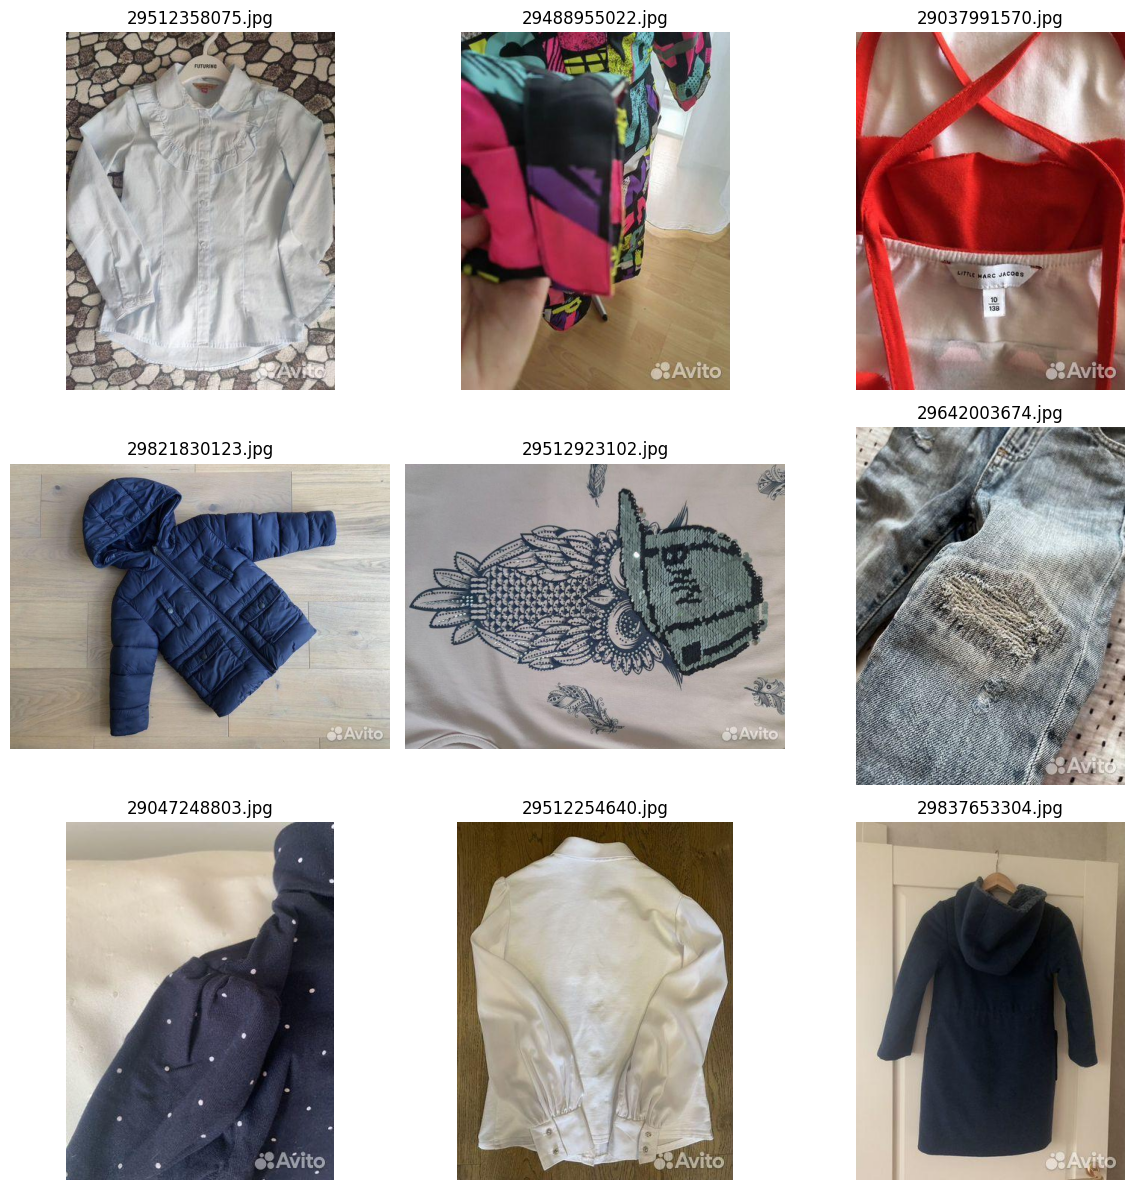

In [9]:
plot_images_from_path(IMG_PATH, num_images=9)

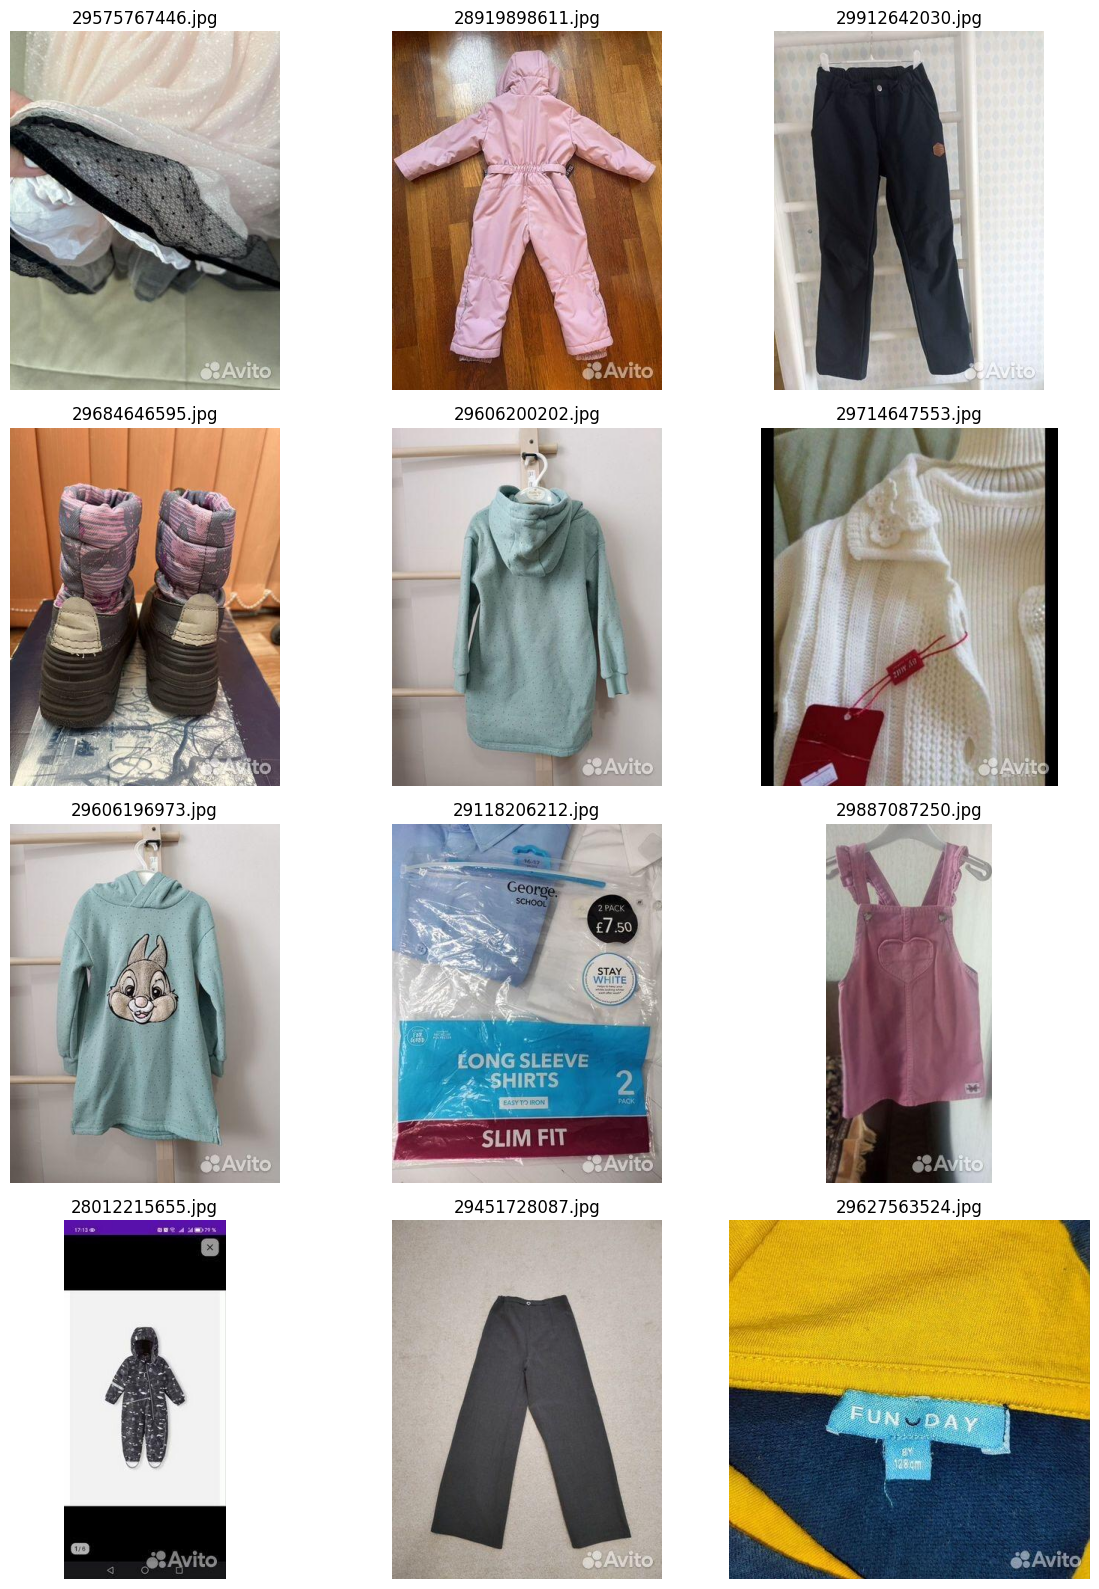

In [10]:
plot_images_from_path(IMG_PATH, num_images=12)

Часть из этих картинок, вероятно, не является первыми для объявления, поэтому они менее информативны, чем первые. Однако часто они отображают дополнительную уточняющую информацию, например размер или рисунок на одежде. Так что просто исключать их из датасета явно не стоит.

При этом наиболее подробная информация должна быть получена с основной первой картинки. 

Разрешение картинки может быть понижено примерно на 30% без потерь, дальше может оказаться сложно различать некоторые элементы или цифры на ней.

По визуальным признакам нет дисбаланса классов. Не считая того, что датасет также состоит только из изображений одежды и обуви и требует расширения для обучения универсальной модели.

Можно использовать горизонтальный флип, также небольшие искажения, как поворот, блюр или изменение яркости и четкости. Вертикальный флип использовать не стоит.

Для расширения датасета можно сгенерировать синтетические изображения, но лучше и проще найти в открытых источниках - это возможно. Они будут более разнообразными.